In [1]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score

### Loading Data and the Best Model

We load the preprocessed and scaled test data and the best trained model that was saved in the Model Selection notebook.

In [2]:
X_test = joblib.load('../data/X_test_scaled.joblib')
y_test = joblib.load('../data/y_test.joblib')
best_model = joblib.load('../models/best_model.joblib')

# Making Predictions

We use the loaded best model to make predictions on the unseen test data. We obtain both the class predictions and the probability scores for the positive class (fraudulent).


In [3]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Credit-Card-Fraud-Detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Credit-Card-Fraud-Detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Detailed Evaluation

Here, we perform a comprehensive evaluation of the model's performance using various metrics and visualizations that are particularly relevant for imbalanced classification problems like fraud detection.


### Confusion Matrix

The confusion matrix provides a breakdown of the model's predictions, showing the counts of true positives, true negatives, false positives, and false negatives. It helps in understanding the types of errors the model is making.


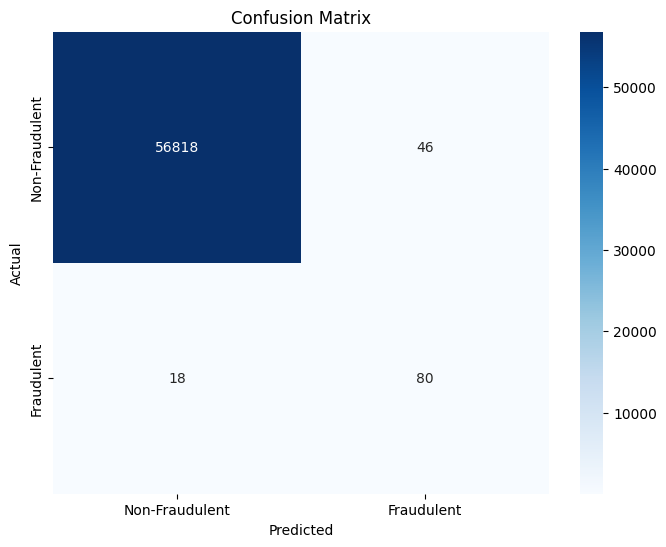

In [4]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Classification Report

The classification report provides key metrics such as precision, recall, F1-score, and support for each class. Precision measures the proportion of correctly predicted positive instances out of all predicted positives. Recall (sensitivity) measures the proportion of correctly predicted positive instances out of all actual positives. The F1-score is the harmonic mean of precision and recall.

In [5]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.63      0.82      0.71        98

    accuracy                           1.00     56962
   macro avg       0.82      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962




### ROC Curve and AUC

The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various threshold levels. The Area Under the ROC Curve (AUC) measures the overall ability of the model to distinguish between the two classes. A higher AUC indicates better performance.


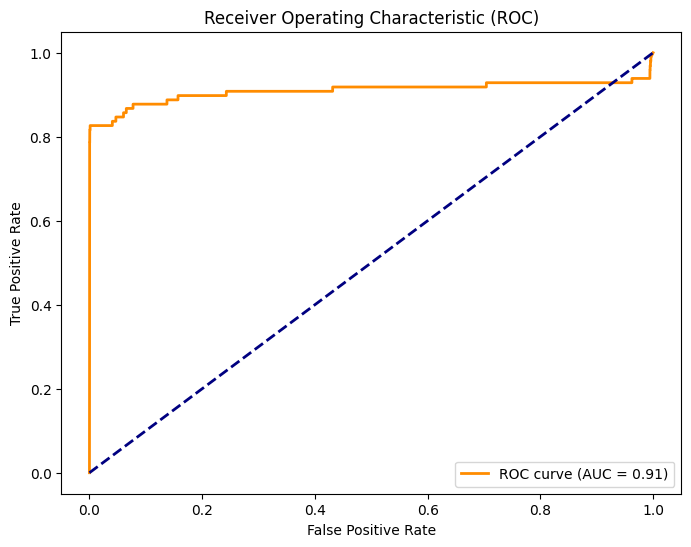

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve and Average Precision

The Precision-Recall (PR) curve plots precision against recall at various threshold levels. The Average Precision (AP) summarizes the PR curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight. The PR curve and AP are often more informative than the ROC curve and AUC for highly imbalanced datasets where the positive class is rare.

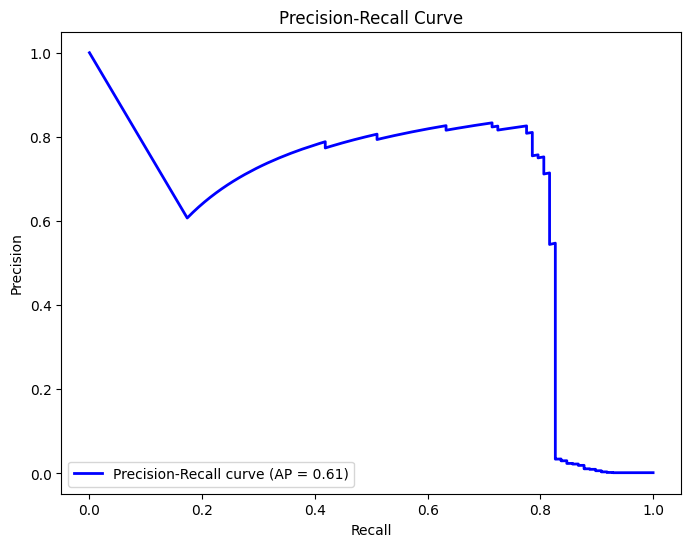

In [7]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()